## Text Mining & Image Recognition
### Laboratorio # 1

#### Herbert Rafael Reyes Portillo
#### Carnet: 23002116

Instrucciones: A continuacion vera una lista de ejercicios que debe completar para poder entregar el laboratorio #1. Para desarrollar su solucion debera utilizar un Notebook el cual contenga todos los ejercicios indicando cada uno de ellos explicitamente con sus resultados. Para la entrega debera subir un link al repositorio de github el cual contiene su solucion.

### Problema 1:
Desarrolle una funcion la cual reciba dos par´ametros, una imagen y un entero llamado color, la funcion debe devolver una imagen la cual tenga activos los canales de color seg´un los siguientes
puntos:
- Si el parametro color vale 1, la imagen debe mostrar activos unicamente el color azul.
- Si el parametro color vale 2, la imagen debe mostrar activos unicamente el color verde.
- Si el parametro color vale 3, la imagen debe mostrar activos unicamente el color rojo.
- Si el parametro color vale 10, la imagen debe mostrar activos unicamente los colores rojo y
verde.
- Si el parametro color vale 20, la imagen debe mostrar activos unicamente los colores verde y
azul.
- Si el parametro color vale 30, la imagen debe mostrar activos unicamente los colores azul y rojo.

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

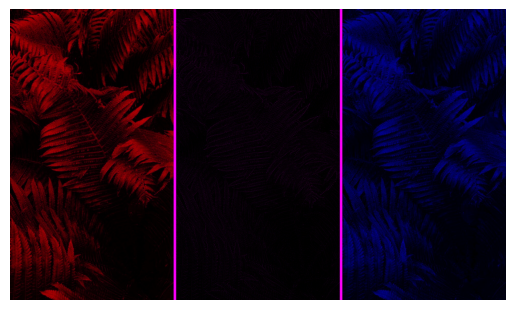

In [22]:
def activar_canales_color(parametro, imagen):

    blue_channel, green_channel, red_channel = cv2.split(imagen)


    color_options = {
        1: (blue_channel, np.zeros_like(green_channel), np.zeros_like(red_channel)),
        2: (np.zeros_like(blue_channel), green_channel, np.zeros_like(red_channel)),
        3: (np.zeros_like(blue_channel), np.zeros_like(green_channel), red_channel),
        10: (np.zeros_like(blue_channel), green_channel, red_channel),
        20: (blue_channel, green_channel, np.zeros_like(red_channel)),
        30: (blue_channel, np.zeros_like(green_channel), red_channel),
    }


    opcion = color_options.get(parametro)

    if opcion is None:
        print("Opción de color no válida. Selecciona un valor valido.")
        return None

    opcion = [channel.astype(np.uint8) for channel in opcion]
    nueva_imagen = cv2.merge(opcion)


    return nueva_imagen


entrada = cv2.imread("./Ejercicio1.jpg")

output_image = activar_canales_color(30,entrada)

if output_image is not None:
    output_image_rgb = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)

    plt.imshow(output_image_rgb)
    plt.axis('off')
    plt.show()